In [3]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [61]:
def load_raw_data(N, avg_k, C, drop_node=True):
    data_dir = f'../data/N{N}/k{avg_k}/C{C}'
    dfs = []

    for file_name in os.listdir(data_dir):
        df = pd.read_csv(os.path.join(data_dir, file_name), 
                        sep=' ', 
                        names=["p", "m1", "m2", "m3", "m4", "s", "node1", "node2", "t"],
                        )
        if drop_node==True:
            df.drop(['node1', 'node2'], axis=1, inplace=True)
        dfs.append(df)
    
    return dfs

def get_averaged_curve(N, avg_k, C):
    dfs = load_raw_data(N, avg_k, C)
    combined_df = pd.concat(dfs)
    mean_df = combined_df.groupby('p').mean()
    std_df = combined_df.groupby('p').std()

    final_df = mean_df.merge(std_df, on='p', suffixes=('', '_std'))
    final_df = final_df.reset_index()
    
    return final_df


In [76]:
N = 2048
avg_k = 4
C = N


dfs = load_raw_data(N=N, avg_k=avg_k, C=C)
final_df = get_averaged_curve(N=N, avg_k=avg_k, C=C)

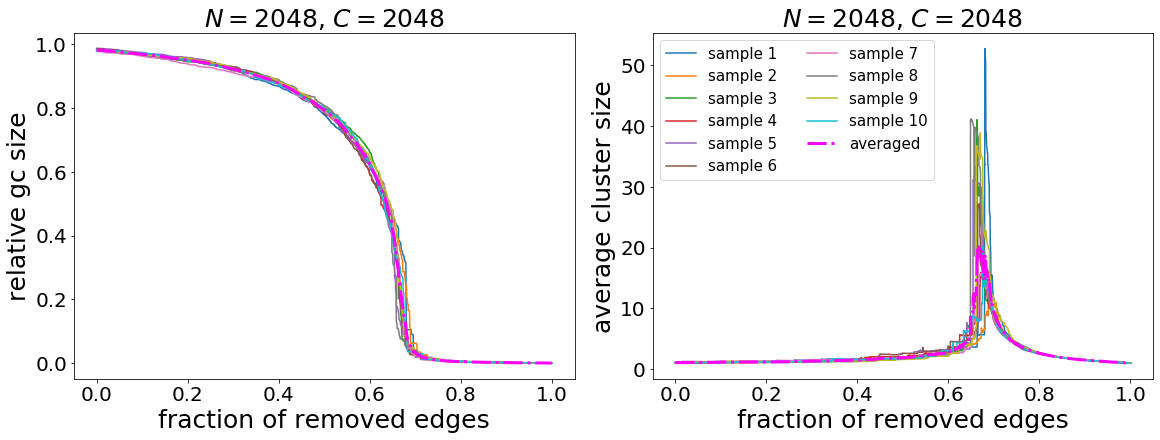

In [77]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6), constrained_layout=True)

for i, df in enumerate(dfs):
    ax[0].plot(df["p"], df["m1"], label=f'sample {i+1}')
    ax[1].plot(df["p"], df["s"], label=f'sample {i+1}')

ax[0].plot(final_df["p"], final_df["m1"], ls='-.', c='magenta', lw=3, label='averaged')
ax[1].plot(final_df["p"], final_df["s"], ls='-.', c='magenta', lw=3, label='averaged')

ax[0].set_title(f'${N = }$, ${C = }$', fontsize=25)
ax[0].set_xlabel('fraction of removed edges', fontsize=25)
ax[0].set_ylabel('relative gc size', fontsize=25)
ax[0].tick_params('both', labelsize=20)

ax[1].set_title(f'${N = }$, ${C = }$', fontsize=25)
ax[1].set_xlabel('fraction of removed edges', fontsize=25)
ax[1].set_ylabel('average cluster size', fontsize=25)
ax[1].tick_params('both', labelsize=20)
ax[1].legend(fontsize=15, ncol=2)

plt.show()

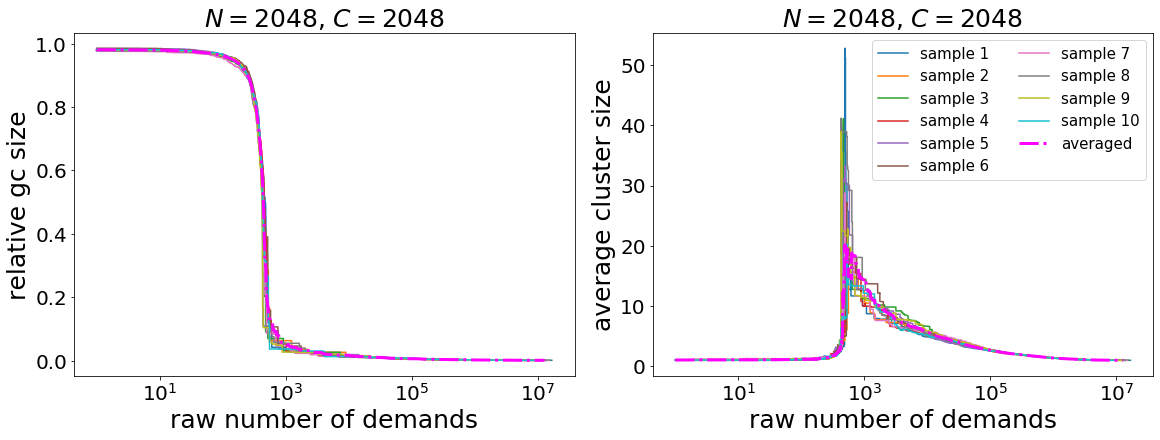

In [79]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6), constrained_layout=True)

for i, df in enumerate(dfs):
    ax[0].plot(df["t"], df["m1"], label=f'sample {i+1}')
    ax[1].plot(df["t"], df["s"], label=f'sample {i+1}')

ax[0].plot(final_df["t"], final_df["m1"], ls='-.', c='magenta', lw=3, label='averaged')
ax[1].plot(final_df["t"], final_df["s"], ls='-.', c='magenta', lw=3, label='averaged')

ax[0].set_title(f'${N = }$, ${C = }$', fontsize=25)
ax[0].set_xlabel('raw number of demands', fontsize=25)
ax[0].set_ylabel('relative gc size', fontsize=25)
ax[0].tick_params('both', labelsize=20)
ax[0].set_xscale('log')

ax[1].set_title(f'${N = }$, ${C = }$', fontsize=25)
ax[1].set_xlabel('raw number of demands', fontsize=25)
ax[1].set_ylabel('average cluster size', fontsize=25)
ax[1].tick_params('both', labelsize=20)
ax[1].legend(fontsize=15, ncol=2)
ax[1].set_xscale('log')

plt.show()

In [81]:
C1_dfs = [get_averaged_curve(N=N, avg_k=avg_k, C=1) for N in [1024, 2048, 4096]]
C2_dfs = [get_averaged_curve(N=N, avg_k=avg_k, C=2) for N in [1024, 2048, 4096]]
C3_dfs = [get_averaged_curve(N=N, avg_k=avg_k, C=3) for N in [1024, 2048, 4096]]
CN_dfs = [get_averaged_curve(N=N, avg_k=avg_k, C=N) for N in [1024, 2048, 4096]]

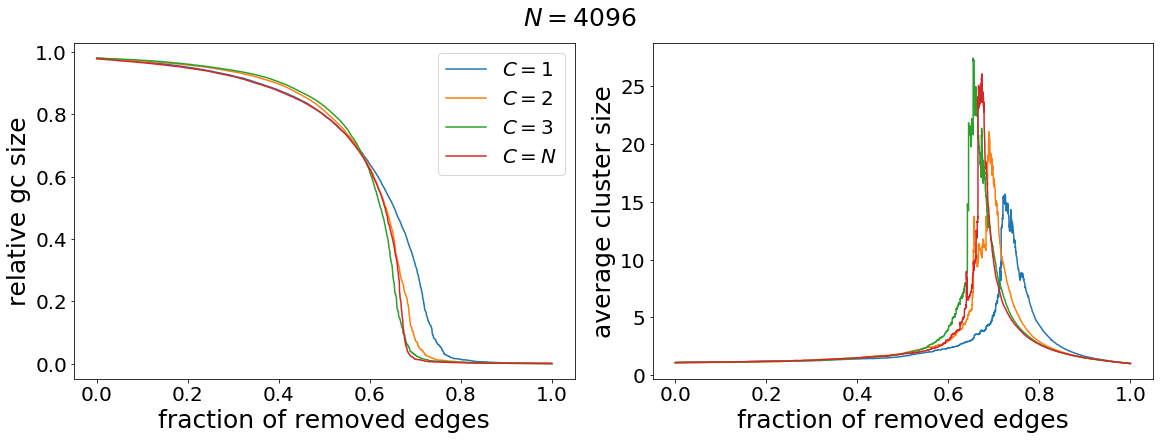

In [93]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6), constrained_layout=True)

fig.suptitle(f'$N=4096$', fontsize=25)

ax[0].plot(C1_dfs[-1]["p"], C1_dfs[-1]["m1"], label='$C=1$')
ax[0].plot(C2_dfs[-1]["p"], C2_dfs[-1]["m1"], label='$C=2$')
ax[0].plot(C3_dfs[-1]["p"], C3_dfs[-1]["m1"], label='$C=3$')
ax[0].plot(CN_dfs[-1]["p"], CN_dfs[-1]["m1"], label='$C=N$')

ax[0].set_xlabel("fraction of removed edges", fontsize=25)
ax[0].set_ylabel("relative gc size", fontsize=25)
ax[0].tick_params("both", labelsize=20)
ax[0].legend(fontsize=20)


ax[1].plot(C1_dfs[-1]["p"], C1_dfs[-1]["s"], label='$C=1$')
ax[1].plot(C2_dfs[-1]["p"], C2_dfs[-1]["s"], label='$C=2$')
ax[1].plot(C3_dfs[-1]["p"], C3_dfs[-1]["s"], label='$C=3$')
ax[1].plot(CN_dfs[-1]["p"], CN_dfs[-1]["s"], label='$C=N$')

ax[1].set_xlabel("fraction of removed edges", fontsize=25)
ax[1].set_ylabel("average cluster size", fontsize=25)
ax[1].tick_params("both", labelsize=20)

plt.show()

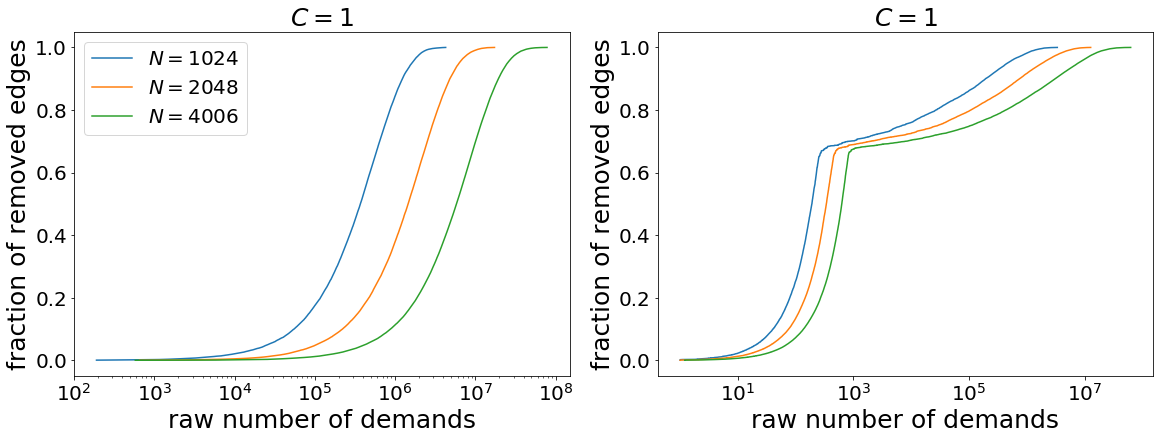

In [97]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6), constrained_layout=True)

ax[0].plot(C1_dfs[0]["t"], C1_dfs[0]["p"], label='$N=1024$')
ax[0].plot(C1_dfs[1]["t"], C1_dfs[1]["p"], label='$N=2048$')
ax[0].plot(C1_dfs[2]["t"], C1_dfs[2]["p"], label='$N=4096$')

ax[0].set_title('$C=1$', fontsize=25)
ax[0].set_xlabel("raw number of demands", fontsize=25)
ax[0].set_ylabel("fraction of removed edges", fontsize=25)
ax[0].tick_params("both", labelsize=20)
ax[0].set_xscale('log')
ax[0].legend(fontsize=20)


ax[1].plot(CN_dfs[0]["t"], CN_dfs[0]["p"], label='$N=1024$')
ax[1].plot(CN_dfs[1]["t"], CN_dfs[1]["p"], label='$N=2048$')
ax[1].plot(CN_dfs[2]["t"], CN_dfs[2]["p"], label='$N=4006$')

ax[1].set_title('$C=1$', fontsize=25)
ax[1].set_xlabel("raw number of demands", fontsize=25)
ax[1].set_ylabel("fraction of removed edges", fontsize=25)
ax[1].tick_params("both", labelsize=20)
ax[1].set_xscale('log')

plt.show()

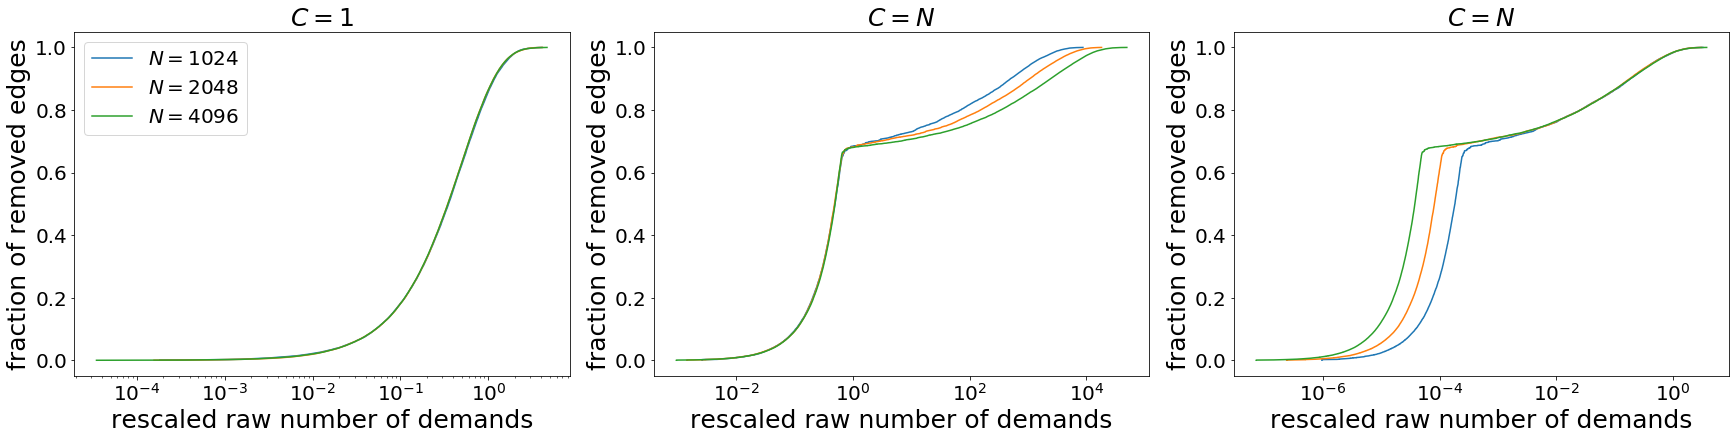

In [107]:
fig, ax = plt.subplots(ncols=3, figsize=(24, 6), constrained_layout=True)

ax[0].plot(C1_dfs[0]["t"] * np.power(1024, -2.), C1_dfs[0]["p"], label='$N=1024$')
ax[0].plot(C1_dfs[1]["t"] * np.power(2048, -2.), C1_dfs[1]["p"], label='$N=2048$')
ax[0].plot(C1_dfs[2]["t"] * np.power(4096, -2.), C1_dfs[2]["p"], label='$N=4096$')

ax[0].set_title('$C=1$', fontsize=25)
ax[0].set_xlabel("rescaled raw number of demands", fontsize=25)
ax[0].set_ylabel("fraction of removed edges", fontsize=25)
ax[0].tick_params("both", labelsize=20)
ax[0].set_xscale('log')
ax[0].legend(fontsize=20)


ax[1].plot(CN_dfs[0]["t"] * np.power(1024, -0.86), CN_dfs[0]["p"], label='$N=1024$')
ax[1].plot(CN_dfs[1]["t"] * np.power(2048, -0.86), CN_dfs[1]["p"], label='$N=2048$')
ax[1].plot(CN_dfs[2]["t"] * np.power(4096, -0.86), CN_dfs[2]["p"], label='$N=4096$')

ax[1].set_title('$C=N$', fontsize=25)
ax[1].set_xlabel("rescaled raw number of demands", fontsize=25)
ax[1].set_ylabel("fraction of removed edges", fontsize=25)
ax[1].tick_params("both", labelsize=20)
ax[1].set_xscale('log')

ax[2].plot(CN_dfs[0]["t"] * np.power(1024, -2.), CN_dfs[0]["p"], label='$N=1024$')
ax[2].plot(CN_dfs[1]["t"] * np.power(2048, -2.), CN_dfs[1]["p"], label='$N=2048$')
ax[2].plot(CN_dfs[2]["t"] * np.power(4096, -2.), CN_dfs[2]["p"], label='$N=4096$')

ax[2].set_title('$C=N$', fontsize=25)
ax[2].set_xlabel("rescaled raw number of demands", fontsize=25)
ax[2].set_ylabel("fraction of removed edges", fontsize=25)
ax[2].tick_params("both", labelsize=20)
ax[2].set_xscale('log')

plt.show()